<>:51: SyntaxWarning: invalid escape sequence '\m'
<>:51: SyntaxWarning: invalid escape sequence '\m'
C:\Users\pantu\AppData\Local\Temp\ipykernel_52412\3121453729.py:51: SyntaxWarning: invalid escape sequence '\m'
  dataset_mnist = torchvision.datasets.MNIST("datasets\mnist", download=True, train=True, transform=transforms)


Using device: cuda


Epoch [1/20], loss_mean=0.265: 100%|██████████| 1313/1313 [00:06<00:00, 188.33it/s]


loss_mean = 0.265, Q_val = 0.185


Epoch [2/20], loss_mean=0.154: 100%|██████████| 1313/1313 [00:08<00:00, 149.83it/s]


loss_mean = 0.154, Q_val = 0.203


Epoch [3/20], loss_mean=0.127: 100%|██████████| 1313/1313 [00:07<00:00, 166.43it/s]


loss_mean = 0.127, Q_val = 0.151


Epoch [4/20], loss_mean=0.111: 100%|██████████| 1313/1313 [00:09<00:00, 137.25it/s]


loss_mean = 0.111, Q_val = 0.150


Epoch [5/20], loss_mean=0.098: 100%|██████████| 1313/1313 [00:08<00:00, 152.38it/s]


loss_mean = 0.098, Q_val = 0.281


Epoch [6/20], loss_mean=0.087: 100%|██████████| 1313/1313 [00:09<00:00, 140.39it/s]


loss_mean = 0.087, Q_val = 0.134


Epoch [7/20], loss_mean=0.082: 100%|██████████| 1313/1313 [00:09<00:00, 138.39it/s]


loss_mean = 0.082, Q_val = 0.119


Epoch [8/20], loss_mean=0.077: 100%|██████████| 1313/1313 [00:09<00:00, 139.09it/s]


loss_mean = 0.077, Q_val = 0.123


Epoch [9/20], loss_mean=0.069: 100%|██████████| 1313/1313 [00:10<00:00, 129.81it/s]


loss_mean = 0.069, Q_val = 0.123


Epoch [10/20], loss_mean=0.065: 100%|██████████| 1313/1313 [00:09<00:00, 140.55it/s]


loss_mean = 0.065, Q_val = 0.103


Epoch [11/20], loss_mean=0.058: 100%|██████████| 1313/1313 [00:09<00:00, 138.22it/s]


loss_mean = 0.058, Q_val = 0.124


Epoch [12/20], loss_mean=0.058: 100%|██████████| 1313/1313 [00:09<00:00, 139.46it/s]


loss_mean = 0.058, Q_val = 0.220


Epoch [13/20], loss_mean=0.059: 100%|██████████| 1313/1313 [00:09<00:00, 139.87it/s]


loss_mean = 0.059, Q_val = 0.134


Epoch [14/20], loss_mean=0.049: 100%|██████████| 1313/1313 [00:09<00:00, 139.21it/s]


loss_mean = 0.049, Q_val = 0.146


Epoch [15/20], loss_mean=0.051: 100%|██████████| 1313/1313 [00:09<00:00, 138.77it/s]


loss_mean = 0.051, Q_val = 0.140


Epoch [16/20], loss_mean=0.055: 100%|██████████| 1313/1313 [00:09<00:00, 139.42it/s]


loss_mean = 0.055, Q_val = 0.209


Epoch [17/20], loss_mean=0.045: 100%|██████████| 1313/1313 [00:08<00:00, 153.32it/s]


loss_mean = 0.045, Q_val = 0.130


Epoch [18/20], loss_mean=0.047: 100%|██████████| 1313/1313 [00:07<00:00, 165.13it/s]


loss_mean = 0.047, Q_val = 0.156


Epoch [19/20], loss_mean=0.042: 100%|██████████| 1313/1313 [00:08<00:00, 156.23it/s]


loss_mean = 0.042, Q_val = 0.144


Epoch [20/20], loss_mean=0.046: 100%|██████████| 1313/1313 [00:07<00:00, 170.34it/s]


loss_mean = 0.046, Q_val = 0.135


100%|██████████| 20/20 [00:02<00:00,  7.62it/s]


Test Accuracy: 0.9720


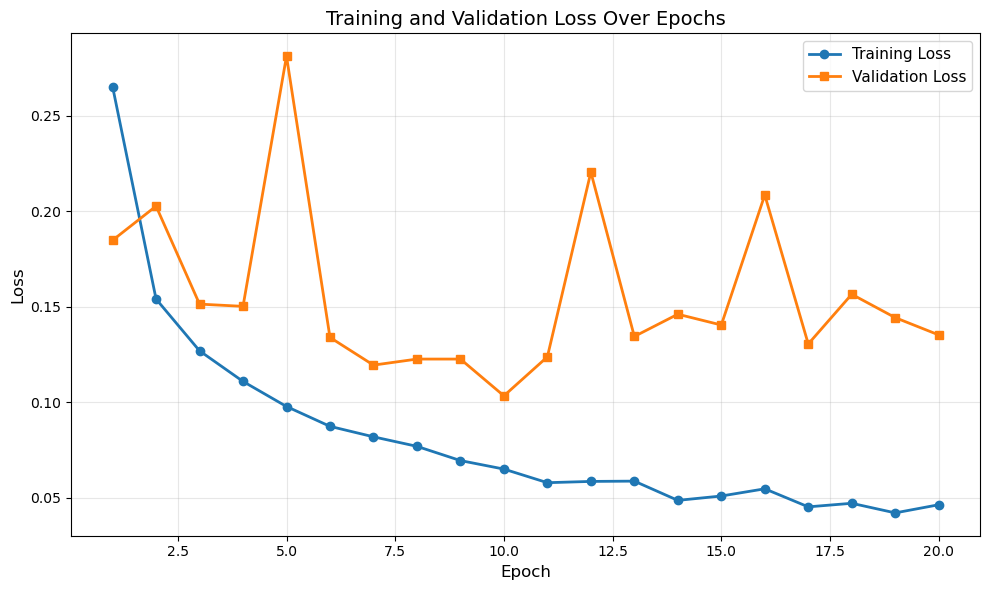


Final Results:
Training Loss: 0.0462
Validation Loss: 0.1352
Test Accuracy: 0.9720


In [1]:
# MNIST save model p4 (batch normalization)
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
import torch
import torch.utils.data as data
import json
from PIL import Image
import torchvision.transforms.v2 as tfs
import torchvision
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

# GPU setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


class RavelTransform(nn.Module):
    def forward(self,item):
        return item.ravel()


class DigitNN(nn.Module):
    def __init__(self, input_dim, num_hid, out_dim):
        super().__init__()
        self.layer1 = nn.Linear(input_dim,num_hid)
        self.layer2 = nn.Linear(num_hid, out_dim)
        self.bm_1 = nn.BatchNorm1d(num_hid) # Batch normalization

    def forward(self,x):
        x = self.layer1(x)
        x = nn.functional.relu(x)
        x = self.bm_1(x)
        x = self.layer2(x)
        return x

model = DigitNN(28 * 28, 128, 10).to(device)  # Move model to GPU


# Setting trnsform
transforms = tfs.Compose([tfs.ToImage(),
                          tfs.Grayscale(), 
                          tfs.ToDtype(torch.float32, scale=True), # converting to float
                          RavelTransform() # or tfs.Lambda(lambda _im: _im.ravel()),
                          ])


dataset_mnist = torchvision.datasets.MNIST("datasets\mnist", download=True, train=True, transform=transforms)
d_train, d_val = data.random_split(dataset_mnist , [0.7, 0.3])
train_data = data.DataLoader(d_train, batch_size=32, shuffle=True)
train_data_val = data.DataLoader(d_val, batch_size=32, shuffle=False)

optimizer = optim.Adam(params=model.parameters(), lr=0.01)
loss_function = nn.CrossEntropyLoss()

# Lists to store metrics for plotting
train_losses = []
val_losses = []

ep = 20
for _e in range(ep):
    model.train()
    loss_mean = 0
    loss_count = 0
    
    train_data_tqdm = tqdm(train_data, leave=True)
    for x_train_img, y_target in train_data_tqdm:
        # Move data to GPU
        x_train_img, y_target = x_train_img.to(device), y_target.to(device)
        
        predict = model(x_train_img)
        loss = loss_function(predict, y_target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_count +=1
        loss_mean = 1/loss_count * loss.item() + (1 - 1/loss_count) * loss_mean
        train_data_tqdm.set_description(f"Epoch [{_e+1}/{ep}], loss_mean={loss_mean:.3f}")

    train_losses.append(loss_mean)

    # Validataion
    model.eval()
    Q_val = 0
    count_val = 0

    with torch.no_grad():  # No gradients needed for validation
        for x_val_img , y_target_val in train_data_val:
            # Move data to GPU
            x_val_img, y_target_val = x_val_img.to(device), y_target_val.to(device)
            
            p = model(x_val_img)
            loss = loss_function(p,y_target_val)
            Q_val+= loss.item()
            count_val +=1
    Q_val /= count_val
    val_losses.append(Q_val)

    print(f"loss_mean = {loss_mean:.3f}, Q_val = {Q_val:.3f}")


# Test
d_test = ImageFolder("datasets/MNIST/test", transform=transforms)
test_data = data.DataLoader(d_test , batch_size=500, shuffle=False)
Q = 0

model.eval()

test_tqdm = tqdm(test_data, leave=True)
with torch.no_grad():  # No gradients needed for testing
    for x_test, y_test in test_tqdm:
        # Move data to GPU
        x_test, y_test = x_test.to(device), y_test.to(device)
        
        p = model(x_test) # 500, 10
        p = torch.argmax(p, dim=1) # 500,1
        Q += torch.sum(p == y_test).item()

Q /= len(d_test)
print(f"Test Accuracy: {Q:.4f}")


# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, ep+1), train_losses, marker='o', label='Training Loss', linewidth=2)
plt.plot(range(1, ep+1), val_losses, marker='s', label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Validation Loss Over Epochs', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('training_validation_loss.png', dpi=150)
plt.show()

print(f"\nFinal Results:")
print(f"Training Loss: {train_losses[-1]:.4f}")
print(f"Validation Loss: {val_losses[-1]:.4f}")
print(f"Test Accuracy: {Q:.4f}")